# Quantitative Trading Course
## _Imperial Blockchain Group_
### Lecture 1 - An introduction to Pandas
#### Lead Instructor: **Imran Khan**
##### YouTube Recording: https://youtu.be/83KqwjvLRHg

<center><img src=Misc_Images\Pandas_Banner.png/></center>

Pandas is a library used to clean, wrangle, munge, manipulate and visualise data. 

The two main objects used in Pandas are:

**1. pandas.Series:** this is a one-dimensional labelled data structure which can store data in various formats (strongs, integers etc.)

**2. pandas.DataFrame:** this is a two-dimensional data structure i.e. a table with rows and columns. A DataFrame can also be seen as a collection of pandas.Series objects as visualised below. 

<center><img src=Misc_Images\Series_vs_DataFrame.jpg/></center>

### Importing Modules

In python, we are able to use access python files created for specialised use cases by importing them into our 'envrionment'. This is done with a simple import statement as seen below:

In [2]:
import pandas                  #importing the whole module
import pandas as pd            #importing the module but with an alias name to make life easier
from pandas import DataFrame   #importing a specific function inside the module

### What We Will Cover

* Creating Series and DataFrames
* Indexing and Slicing Series and DataFrames
* Combining Series and DataFrames
* Handling Missing Data
* Data Aggregation
* Plotting


# Creating Series and DataFrames

This section will explore some simple ways to convert to DataFrame and Series object in Python.

To create Series and DataFrame objects, you need to use the pd.Series() and pd.DataFrame() functions:

* pd.Series(data, index, dtype, name):
    > data: array-like data type
    <br> 
    > index: values used to access rows quicker
    </br>
    > dtype: data type of series
    <br>
    > name: name to give to Series
    </br>


* pd.DataFrame(data, index, columns, name):
    > Same as above except for columns, can pass a list for columns of dataframe

In [3]:
# List to Series

coins = ['Bitcoin', 'Ethereum', 'Solana', 'Avalanche']                  #defining a coins list
coins_series = pd.Series(coins)                                         #create a series out of the list - instantiating a Series object

print(coins_series)                                                     #print that Series object
print("The type of coin_series is: {}".format(type(coins_series)))      #print the data type to confirm it is indeed a Series object

0      Bitcoin
1     Ethereum
2       Solana
3    Avalanche
dtype: object
The type of coin_series is: <class 'pandas.core.series.Series'>


You probably noticed that there are numbers assigned to each row in the column of the Series and this is what is known as the index of the Series. We get into more detail about this in the 'Indexing and Slicing' section.

We can also convert the same 'coins' list to a DataFrame - there isn't much difference except that it is formatted nicer in the output and the fact you may be able to access different functions

##### LIST TO DATAFRAME

In [4]:
coins_df = pd.DataFrame(coins)

print("The type of coin_df is: {}".format(type(coins_df)))
coins_df

The type of coin_df is: <class 'pandas.core.frame.DataFrame'>


,0
0,Bitcoin
1,Ethereum
2,Solana
3,Avalanche


##### LIST OF LISTS TO DATAFRAME

Each sub-list represents a row and another list is passed into the pd.DataFrame function as the 'columns' argument

In [5]:
coin_info = [['Bitcoin', 100000, 1], ['Ethereum', 20000, 2], ['Solana', 1000, 3], ['Avalanche', 300, 4]]
coin_info_df = pd.DataFrame(coin_info, columns=['Coin', 'Price_USD', 'Rank'])
coin_info_df

,Coin,Price_USD,Rank
0,Bitcoin,100000,1
1,Ethereum,20000,2
2,Solana,1000,3
3,Avalanche,300,4


##### LIST OF DICTIONARIES TO DATAFRAME

Each ditionary represents a row entry with the key being the column for the assigned value in that row

In [6]:
coin_list_of_dicts = [
    {'Coin': 'Bitcoin', 'Price_USD': 100000, 'Rank': 1},
    {'Coin': 'Ethereum', 'Price_USD': 20000, 'Rank': 2},
    {'Coin': 'Solana', 'Price_USD': 1000, 'Rank': 3},
    {'Coin': 'Avalanche', 'Price_USD': 300, 'Rank': 4},
    {'Coin': 'NKS2-77GH6E-BXBF', 'Price_USD': 100, 'Rank': 5}]

coin_df = pd.DataFrame(coin_list_of_dicts)
coin_df

,Coin,Price_USD,Rank
0,Bitcoin,100000,1
1,Ethereum,20000,2
2,Solana,1000,3
3,Avalanche,300,4
4,NKS2-77GH6E-BXBF,100,5


##### DICTIONARY OF LISTS TO DATAFRAME

Each key represents a column name and their respective value (the list) represents the data entries for that column

In [7]:
coins_dict_of_lists = {'Coin': ['Bitcoin', 'Ethereum', 'Solana', 'Avalanche'],
                        'Price_USD': [100000, 20000, 1000, 300],
                        'Rank': [1, 2, 3, 4]}

coin_df = pd.DataFrame(coins_dict_of_lists)
coin_df

,Coin,Price_USD,Rank
0,Bitcoin,100000,1
1,Ethereum,20000,2
2,Solana,1000,3
3,Avalanche,300,4


##### DICTIONARY OF SERIES TO DATAFRAME

In [8]:
coin_series = pd.Series(['Bitcoin', 'Ethereum', 'Solana', 'Avalanche'])
price_series = pd.Series([100000, 20000, 1000, 300])
rank_series = pd.Series([1, 2, 3, 4])

#create dictionary of series
coin_dict = {'Coin': coin_series,
                     'Price_USD': price_series,
                     'Rank': rank_series}

coin_df = pd.DataFrame(coin_dict)
coin_df

,Coin,Price_USD,Rank
0,Bitcoin,100000,1
1,Ethereum,20000,2
2,Solana,1000,3
3,Avalanche,300,4


##### List of Tuples to DataFrame

We can make use of the zip() function to create a list of tuples. The zip() function is a built in function of Python which takes in an iterable and aggregates them into tuples where the i'th tuple contains the i'th element from each of the iterables in the order passed into the zip function.

You may be wondering what the hell is an iterable... An iterable is an object which can be iterated over i.e. something that has a countable number of values. For example, a list is an iterable; it has a countable number of values, also known as elements. 

list = [2,3,4,5,6]
list has 5 values, you can iterate through the list to get each value. Iterations can be done via for loops:


```
for i in range(len(list)+1):
    
    print(list[i])
```

In [9]:
coins = ['Bitcoin', 'Ethereum', 'Solana', 'Avalanche']
prices_usd = [10000, 20000, 1000, 300]

#merge them with zip function then convert to list
list_of_tuples = list(zip(coins, prices_usd))
coin_df = pd.DataFrame(list_of_tuples)
coin_df

,0,1
0,Bitcoin,10000
1,Ethereum,20000
2,Solana,1000
3,Avalanche,300


Note that this way of converting to DataFrame does not have any column names. This is because the list_of_tuples we use to covnert to a DataFrame stores no such information. Hence columns will have to be passed into the pd.DataFrame() function like below:

In [10]:
coin_df = pd.DataFrame(list_of_tuples, columns=['Coin', 'Prices_USD'])
coin_df

,Coin,Prices_USD
0,Bitcoin,10000
1,Ethereum,20000
2,Solana,1000
3,Avalanche,300


##### DATAFRAME TO SERIES

As you can see below, a column of a DataFrame is a Series object whereas multiple columns together still make up a DataFrame. This reaffirms the idea that a DataFrame is made up of a combination of individual Series.

In [11]:
#The expression below takes only the 'Coin' column via a method known as indexing (we will cover this later)
coins = coin_df['Coin'] 
print(coins)
print(type(coins))  #this allows you to find out the type of the object stored in the coins variable

0      Bitcoin
1     Ethereum
2       Solana
3    Avalanche
Name: Coin, dtype: object
<class 'pandas.core.series.Series'>


*We've covered a few ways to convert conventional Python data structures into Pandas Series and DataFrames but sometimes we will deal with other file types and sources. We shall look into how to do this in the next section!*

### READING FILES AND CONVERTING THEM TO DATAFRAMES

This section will cover
 
* CSV Files
* String CSVs
* HTML Files

##### CSV FILES

Pandas has a read_csv() function which converts a CSV file into a DataFrame object 

The CSV we are using is taken directly from the chartbot at the time of writing and saved in this github repo to make it easy. Sometimes you may want to read a CSV stored locally on your computer which requires passing the file path of the CSV file into the file_path variable below.

In [12]:
file_path = 'Files\Trade Volume of NFTs by Chain.csv'  #this is a relative file path
nft_df = pd.read_csv(file_path)
nft_df

,Date,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
0,2017-10-29,1.979685e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
1,2017-11-05,4.097981e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2,2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
3,2017-11-19,1.106104e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
4,2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,1337.308456,420804.434940
246,2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,1238.117488,420158.643307
247,2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,417.064534,163972.234426
248,2022-07-31,7.198807e+07,7.172923e+05,2.985796e+06,9.663910e+06,371242.592958,543500.865677,97471.647787,297194.18,1.609207e+06,533.625044,130338.709348


You can do more with the read_csv() function such as the 'header' argument - this indicates the the row number in the CSV to use as column names. By default, this number is set to 0 i.e. the first row (since Python uses zero-based indexing).

In [13]:
# change the number assigned to header to see what happens when you run the cell
nft_df = pd.read_csv(file_path, header=0)
nft_df

,Date,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
0,2017-10-29,1.979685e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
1,2017-11-05,4.097981e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2,2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
3,2017-11-19,1.106104e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
4,2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,1337.308456,420804.434940
246,2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,1238.117488,420158.643307
247,2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,417.064534,163972.234426
248,2022-07-31,7.198807e+07,7.172923e+05,2.985796e+06,9.663910e+06,371242.592958,543500.865677,97471.647787,297194.18,1.609207e+06,533.625044,130338.709348


You can even specify a column to have as the index of the DataFrame as a way to easily access rows. Hence indexes can sometimes be seen as unique identifiers (even though they don't have to be). We will explore how to make use of indexes in the next section. 

We can specify a column in the CSV to become an index by either its' string representation ('Date') or its' integer location which would've been 0. 


In [14]:
# change index_col assignment to 0 and see if you get the same - what happens if you choose a different column? 
nft_df = pd.read_csv(file_path, header= 0, index_col='Date')
nft_df

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,1.979685e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-05,4.097981e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-19,1.106104e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,1337.308456,420804.434940
2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,1238.117488,420158.643307
2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,417.064534,163972.234426


What if you wanted to only extract data from specific Layer 1s? You could make use of the usecols argument and pass a list of column names (or their integer position) - note the index column (if you specify one) needs to be included one in the usecols list.

In [15]:
nft_df = pd.read_csv(file_path, header= 0, index_col='Date', usecols=['Date', 'Ethereum', 'Solana', 'Avalanche'])
nft_df

,Ethereum,Solana,Avalanche
Date,,,
2017-10-29,1.979685e+02,0.000000e+00,0.000000
2017-11-05,4.097981e+02,0.000000e+00,0.000000
2017-11-12,3.561566e+02,0.000000e+00,0.000000
2017-11-19,1.106104e+04,0.000000e+00,0.000000
2017-11-26,3.973305e+05,0.000000e+00,0.000000
...,...,...,...
2022-07-10,1.378633e+08,1.219296e+07,420804.434940
2022-07-17,1.369341e+08,1.486498e+07,420158.643307
2022-07-24,8.626880e+07,1.013194e+07,163972.234426


There are many other arguments you could take advantage of such as:
<br> 
>  skiprows: number of rows to skip, can either be a list of specific rows to exclude (zero-index based) or a single integer to indicate the amount of rows to exclude from the top of the file 

> skipfooter: number of rows to skip from bottom of the file

> nrows: number of rows of file to read. Useful for large csv files

> and many more...
</br>

Feel free to explore more: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html



##### EXCEL FILES

Excel Files are quite easy to deal with - to read an excel file into a DataFrame, we make use of the read_excel() function. There are many arguments you can pass into the function to make converting into a DataFrame easier to produce an output how you want it:

In [16]:
!pip install openpyxl

In [17]:
file_path = r'Files\nft_data.xlsx'  #this is a relative file path
nft_df = pd.read_excel(file_path, sheet_name = 'nft_transactions')
nft_df

,Date,nba-topshot,cryptopunks,hashmasks,art-blocks,bored-ape-yacht-club,meebits,pudgy-penguins,axie-infinity,cryptokitties,gods-unchained,alien-worlds,cryptoblades,illuvium
0,1588291200,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,2218,83,NaN,NaN,NaN
1,1588377600,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,2023,77,NaN,NaN,NaN
2,1588464000,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,1692,68,NaN,NaN,NaN
3,1588550400,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,1048,51,NaN,NaN,NaN
4,1588636800,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,1339,117,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,1657152000,43813.0,55,9.0,256.0,46.0,24.0,20.0,147329.0,64,19022,11802063.0,154685.0,13.0
806,1657238400,56036.0,65,6.0,281.0,101.0,29.0,22.0,161359.0,91,18322,12337891.0,152557.0,16.0
807,1657324800,60392.0,123,18.0,392.0,73.0,26.0,30.0,152389.0,45,16828,11350204.0,151288.0,29.0
808,1657411200,32426.0,347,12.0,256.0,76.0,39.0,23.0,124619.0,165,16976,11737920.0,144720.0,23.0


In [18]:
file_path = r'Files\nft_data.xlsx'  #this is a relative file path
nft_df = pd.read_excel(file_path, sheet_name = ['nft_transactions', 'nft_marketplaces'])
nft_df

{'nft_transactions':            Date  nba-topshot  cryptopunks  hashmasks  art-blocks  \
 0    1588291200          NaN           36        NaN         NaN   
 1    1588377600          NaN           27        NaN         NaN   
 2    1588464000          NaN           47        NaN         NaN   
 3    1588550400          NaN           13        NaN         NaN   
 4    1588636800          NaN           63        NaN         NaN   
 ..          ...          ...          ...        ...         ...   
 805  1657152000      43813.0           55        9.0       256.0   
 806  1657238400      56036.0           65        6.0       281.0   
 807  1657324800      60392.0          123       18.0       392.0   
 808  1657411200      32426.0          347       12.0       256.0   
 809  1657497600      28449.0          272       25.0       193.0   
 
      bored-ape-yacht-club  meebits  pudgy-penguins  axie-infinity  \
 0                     NaN      NaN             NaN            NaN   
 1        

As you can see above, this returns a dictionary of DataFrames with each key representing a sheet and their respective value being the DataFrame created out of that individual sheet.

The read_excel file shares most of the possible parameters you can pass into the read_csv file so feel free to experiment further using the following documentation:
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

#### HTML FILES

Sometimes you may need to scrape data from a web page. We will go into this in our requests library tutorials in more detail but for now we will just look at how to read a table from a HTML page. 

In [19]:
#if you don't have requests or json installed then uncomment the below two lines
#!pip install requests
#!pip install json

import requests
import json


In [20]:
url = "https://cryptoart.io/monthly_crypto_art_volume"
crypto_art_volume_df = pd.DataFrame(requests.get(url))
crypto_art_volume_df

,0
0,"b'[{""async"":null,""foundation"":null,""knownorigi..."
1,"b'5},{""async"":null,""foundation"":null,""knownori..."
2,"b'6610000001},{""async"":null,""foundation"":null,..."
3,"b'"":1514.8621200000002},{""async"":null,""foundat..."
4,"b':00:00+00:00"",""superrare"":4738.636105921015}..."
...,...
86,"b'"":143811.21554432192,""makersplace"":89859.690..."
87,"b'cks"":7889602.346852077,""async"":45128.6207890..."
88,"b'9026.885010861326,""month"":""2022-12-01T00:00:..."
89,"b'5.06157999998,""foundation"":1959141.506673966..."


As you can see the output returned is messy and doesn't tell us anything. Sometimes converting what you scrape into a JSON format makes it easier to deal with. Although the output from the code is below, there is a clear structure: a list of dictionaries representing volume data for each month.

In [21]:
print(requests.get(url).json())

[{'async': None, 'foundation': None, 'knownorigin': None, 'makersplace': None, 'month': '2018-04-01T00:00:00+00:00', 'superrare': 6562.07435}, {'async': None, 'foundation': None, 'knownorigin': None, 'makersplace': None, 'month': '2018-05-01T00:00:00+00:00', 'superrare': 6702.766610000001}, {'async': None, 'foundation': None, 'knownorigin': None, 'makersplace': None, 'month': '2018-06-01T00:00:00+00:00', 'superrare': 1514.8621200000002}, {'async': None, 'foundation': None, 'knownorigin': None, 'makersplace': 13.236600000000001, 'month': '2018-07-01T00:00:00+00:00', 'superrare': 4738.636105921015}, {'async': None, 'foundation': None, 'knownorigin': None, 'makersplace': 27.549000000000003, 'month': '2018-08-01T00:00:00+00:00', 'superrare': 2016.033059}, {'async': None, 'foundation': None, 'knownorigin': 136.361065, 'makersplace': 22.4666, 'month': '2018-09-01T00:00:00+00:00', 'superrare': 3745.352398000001}, {'async': None, 'foundation': None, 'knownorigin': 540.77807, 'makersplace': 275

Instead of the head() function, I've used the tail() function which returns the last certain number of rows (in this case 10) of the dataframe. This is because I want to look at the last 10 months. You may also notice the month column being in the middle of the DataFrame which looks awkward. We will get to ordering columns and setting indexes at a later tutorial.

In [22]:
crypto_art_volume_df = pd.DataFrame(requests.get(url).json())
crypto_art_volume_df.tail(10)

,async,foundation,knownorigin,makersplace,month,superrare,niftygateway,artblocks
48,558653.996340,8.279065e+06,602406.895784,3.729377e+05,2022-04-01T00:00:00+00:00,9.047025e+06,39861932.32,1.725241e+07
49,625494.860733,4.030272e+06,315245.725616,1.779998e+05,2022-05-01T00:00:00+00:00,5.085776e+06,7492567.46,4.794178e+07
50,197239.278379,2.652648e+06,168335.718246,1.024788e+06,2022-06-01T00:00:00+00:00,2.787106e+06,3905039.65,1.296081e+07
51,431634.304961,3.002113e+06,140355.312298,9.528420e+04,2022-07-01T00:00:00+00:00,5.579930e+06,NaN,2.090251e+07
52,763723.442921,2.993868e+06,255117.859541,1.320228e+05,2022-08-01T00:00:00+00:00,7.452872e+06,NaN,1.104488e+07
53,24662.079581,2.540708e+06,496441.611184,8.206731e+04,2022-09-01T00:00:00+00:00,4.013740e+06,NaN,8.101446e+06
54,30660.386310,2.264347e+06,161995.898710,3.946182e+04,2022-10-01T00:00:00+00:00,3.261900e+06,NaN,1.465977e+07
55,112860.009460,2.010481e+06,143811.215544,8.985969e+04,2022-11-01T00:00:00+00:00,2.361289e+06,NaN,1.490698e+07
56,45128.620789,2.018901e+06,154796.685043,5.902689e+04,2022-12-01T00:00:00+00:00,2.903396e+06,NaN,7.889602e+06
57,62345.061580,1.959142e+06,128989.430037,1.113808e+04,2023-01-01T00:00:00+00:00,2.508164e+06,NaN,8.967876e+05


*We've learnt how to read different file formats and convert them into DataFrames. Now we will move on to indexing and slicing DataFrames.*

### INDEXING AND SLICING SERIES AND DATAFRAMES

Indexing a data structure (like a Series or DataFrame) is when you access a specific part of a data structure whether that is a row or column.

Slicing a data structure is when you want to access a subset of a data structure.

You may be wondering how they are different but this will become more apparent as we go through some examples.

##### The .loc[ ] property

In [23]:
file_path = 'Files\Trade Volume of NFTs by Chain.csv'  #this is a relative file path
nft_df = pd.read_csv(file_path)
nft_df

,Date,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
0,2017-10-29,1.979685e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
1,2017-11-05,4.097981e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2,2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
3,2017-11-19,1.106104e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
4,2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,1337.308456,420804.434940
246,2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,1238.117488,420158.643307
247,2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,417.064534,163972.234426
248,2022-07-31,7.198807e+07,7.172923e+05,2.985796e+06,9.663910e+06,371242.592958,543500.865677,97471.647787,297194.18,1.609207e+06,533.625044,130338.709348


We can see the the index is just numbers that start from 0. We can use the loc[ ] property to access a specific row based on its' index label whether the index is a number or of another data type

In [24]:
nft_df.loc[0]   #this returns the first record of the DataFrame as a Series object - change the number to another number and see what you get, how about the number 250? Why does that not work?

Date         2017-10-29
Ethereum     197.968469
Ronin               0.0
Flow                0.0
Solana              0.0
WAX                 0.0
Polygon             0.0
Tezos               0.0
Panini              0.0
BNB Chain           0.0
Theta               0.0
Avalanche           0.0
Name: 0, dtype: object

You may have noticed the index of the series returned above are the columns of the original DataFrame, you can confirm this by returning just the index of a DataFrame using the index attribute

In [25]:
nft_df.loc[0].index

Index(['Date', 'Ethereum', 'Ronin', 'Flow', 'Solana', 'WAX', 'Polygon',
       'Tezos', 'Panini', 'BNB Chain', 'Theta', 'Avalanche'],
      dtype='object')

You may be asking, can we access multiple rows at once. You can but you must past a list of list i.e. double square bracket. This will return a DataFrame. Let's try it:

In [26]:
nft_df.loc[[0,1,2,3]]

,Date,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
0,2017-10-29,197.968469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-11-05,409.798127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-11-12,356.156629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-11-19,11061.040484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The loc property also works with labelled indexes. Before we demonstrate that, we need to change the index so that it is not integer based anymore. We can do this either by passing a list into the an 'index' paramater when initially creating a DataFrame. We'll try this with a DataFrame we created in the 'Creating Series and DataFrame' section.

Instead of including the 'Coin' column in the list of lists and columns argument of the pd.DataFrame() function, I passed a list of the coins into the index parameter 

In [27]:
coin_info = [[100000, 1], [20000, 2], [1000, 3], [300, 4], [1, 15]]
coin_info_df = pd.DataFrame(coin_info, columns=['Price_USD', 'Rank'], index=['Bitcoin', 'Ethereum', 'Solana', 'Avalanche', 'Cardano'])
coin_info_df

,Price_USD,Rank
Bitcoin,100000,1
Ethereum,20000,2
Solana,1000,3
Avalanche,300,4
Cardano,1,15


But this can be very long-winded especially when you deal with larger DataFrames so it is much more common to load in the DataFrame and then set an index based on the columns already stored in the DataFrame. This can be done by taking advantage of the set_index() function.

NOTE: Using the set_index() doesn't change the DataFrame but creates a new object which you assign to a variable (in this case I've chosen to give it the same name but you can convince yourself by chaning 'nft_df' on the left hand side of the equal sign on the third line). Alternatively, you could just pass 'inplace = True' into the set_index function which changes the DataFrame you are changing directly (it doesn't return a new object). In other words, by using 'inplace=True' you are changing the state of the DataFrame object. You can't revert back to the original DataFrame without undoing the actions in code.


In [28]:
file_path = 'Files/Trade Volume of NFTs by Chain.csv'  #this is a relative file path
nft_df = pd.read_csv(file_path)
nft_df = nft_df.set_index('Date')
print(nft_df.index)

Index(['2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26',
       '2017-12-03', '2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31',
       ...
       '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26', '2022-07-03',
       '2022-07-10', '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07'],
      dtype='object', name='Date', length=250)


Previously I mentioned the loc indexing property was used to locate a row in a DataFrame based on its' index label/name but it may have not been clear since the index was integer based. To further drive the point here are some examples where the index is the Date:

In [29]:
nft_df.loc['2017-10-29']     #single row

Ethereum     197.968469
Ronin          0.000000
Flow           0.000000
Solana         0.000000
WAX            0.000000
Polygon        0.000000
Tezos          0.000000
Panini         0.000000
BNB Chain      0.000000
Theta          0.000000
Avalanche      0.000000
Name: 2017-10-29, dtype: float64

In [30]:
nft_df.loc[['2017-10-29', '2022-07-31', '2022-08-07']]     #multiple rows

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,1.979685e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2022-07-31,7.198807e+07,717292.322906,2.985796e+06,9.663910e+06,371242.592958,543500.865677,97471.647787,297194.18,1.609207e+06,533.625044,130338.709348
2022-08-07,1.025420e+07,120416.743123,4.483670e+05,1.414179e+06,69196.994617,50555.846942,11844.575474,36034.00,2.275900e+05,232.330961,20248.974372


What if we wanted to reset the index to what we was before? We could use the reset_index() function for this.

Note: you could also use inplace=True here if you wanted to change the state of nft_df without having to create another copy of the DataFrame (but again this is not best practice).

In [31]:
nft = nft_df.reset_index()
nft 

,Date,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
0,2017-10-29,1.979685e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
1,2017-11-05,4.097981e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2,2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
3,2017-11-19,1.106104e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
4,2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,1337.308456,420804.434940
246,2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,1238.117488,420158.643307
247,2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,417.064534,163972.234426
248,2022-07-31,7.198807e+07,7.172923e+05,2.985796e+06,9.663910e+06,371242.592958,543500.865677,97471.647787,297194.18,1.609207e+06,533.625044,130338.709348


##### The .iloc[ ] property

So far we have covered how to access rows of a DataFrame based on index label/name but what if we wanted to index a record based on its' row position. We could do this by making use of the iloc property of a DataFrame (or Series). 

We can pass in a single position, multiple position or even a slice.

In [32]:
nft_df.iloc[0]   #first record of dataframe

Ethereum     197.968469
Ronin          0.000000
Flow           0.000000
Solana         0.000000
WAX            0.000000
Polygon        0.000000
Tezos          0.000000
Panini         0.000000
BNB Chain      0.000000
Theta          0.000000
Avalanche      0.000000
Name: 2017-10-29, dtype: float64

In [33]:
nft_df.iloc[[0,1,2]]    #first 3 record of DataFrame 

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,197.968469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-05,409.798127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-12,356.156629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
nft_df.iloc[:3] #first 3 records of DataFrame with slice object

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,197.968469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-05,409.798127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-12,356.156629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can also index both rows and columns with iloc - we can do this to access a single value or multiple values.

In [35]:
nft_df.iloc[1:4, 0:3]

,Ethereum,Ronin,Flow
Date,,,
2017-11-05,409.798127,0.0,0.0
2017-11-12,356.156629,0.0,0.0
2017-11-19,11061.040484,0.0,0.0


##### Indexing Columns Only

You can index columns of a DataFrame by using the following syntax: df[columns] where columns is either the name of a single column (this will return a Series) or a list of the columns you want to filter for (this will return a DataFrame).

You may notice that filtering for columns like this will not alter the original DataFrame - you would assign it to a variable if you want to keep using it like below:

In [36]:
nft_df_dates = nft['Date']
nft_df_dates

0      2017-10-29
1      2017-11-05
2      2017-11-12
3      2017-11-19
4      2017-11-26
          ...    
245    2022-07-10
246    2022-07-17
247    2022-07-24
248    2022-07-31
249    2022-08-07
Name: Date, Length: 250, dtype: object

In [37]:
nft[['Date']]    #double square brackets will return a DataFrame

,Date
0,2017-10-29
1,2017-11-05
2,2017-11-12
3,2017-11-19
4,2017-11-26
...,...
245,2022-07-10
246,2022-07-17
247,2022-07-24
248,2022-07-31


In [38]:
nft[['Date', 'Ethereum', 'Solana', 'Avalanche']]

,Date,Ethereum,Solana,Avalanche
0,2017-10-29,1.979685e+02,0.000000e+00,0.000000
1,2017-11-05,4.097981e+02,0.000000e+00,0.000000
2,2017-11-12,3.561566e+02,0.000000e+00,0.000000
3,2017-11-19,1.106104e+04,0.000000e+00,0.000000
4,2017-11-26,3.973305e+05,0.000000e+00,0.000000
...,...,...,...,...
245,2022-07-10,1.378633e+08,1.219296e+07,420804.434940
246,2022-07-17,1.369341e+08,1.486498e+07,420158.643307
247,2022-07-24,8.626880e+07,1.013194e+07,163972.234426
248,2022-07-31,7.198807e+07,9.663910e+06,130338.709348


You can also use the column attribute to get the columns of a DataFrame:

In [39]:
nft.columns

Index(['Date', 'Ethereum', 'Ronin', 'Flow', 'Solana', 'WAX', 'Polygon',
       'Tezos', 'Panini', 'BNB Chain', 'Theta', 'Avalanche'],
      dtype='object')

You can see it returns a weird Index object - you can convert this to a list to make it easier to deal with by using the **tolist()** function:

In [40]:
nft.columns.tolist()

['Date',
 'Ethereum',
 'Ronin',
 'Flow',
 'Solana',
 'WAX',
 'Polygon',
 'Tezos',
 'Panini',
 'BNB Chain',
 'Theta',
 'Avalanche']

You can do the same with indexes:

In [41]:
nft_df = nft.set_index('Date')
nft_df.index.tolist()

['2017-10-29',
 '2017-11-05',
 '2017-11-12',
 '2017-11-19',
 '2017-11-26',
 '2017-12-03',
 '2017-12-10',
 '2017-12-17',
 '2017-12-24',
 '2017-12-31',
 '2018-01-07',
 '2018-01-14',
 '2018-01-21',
 '2018-01-28',
 '2018-02-04',
 '2018-02-11',
 '2018-02-18',
 '2018-02-25',
 '2018-03-04',
 '2018-03-11',
 '2018-03-18',
 '2018-03-25',
 '2018-04-01',
 '2018-04-08',
 '2018-04-15',
 '2018-04-22',
 '2018-04-29',
 '2018-05-06',
 '2018-05-13',
 '2018-05-20',
 '2018-05-27',
 '2018-06-03',
 '2018-06-10',
 '2018-06-17',
 '2018-06-24',
 '2018-07-01',
 '2018-07-08',
 '2018-07-15',
 '2018-07-22',
 '2018-07-29',
 '2018-08-05',
 '2018-08-12',
 '2018-08-19',
 '2018-08-26',
 '2018-09-02',
 '2018-09-09',
 '2018-09-16',
 '2018-09-23',
 '2018-09-30',
 '2018-10-07',
 '2018-10-14',
 '2018-10-21',
 '2018-10-28',
 '2018-11-04',
 '2018-11-11',
 '2018-11-18',
 '2018-11-25',
 '2018-12-02',
 '2018-12-09',
 '2018-12-16',
 '2018-12-23',
 '2018-12-30',
 '2019-01-06',
 '2019-01-13',
 '2019-01-20',
 '2019-01-27',
 '2019-02-

##### BOOLEAN INDEXING 

Boolean indexing allows us to easily filter DataFrames. This is done by returning a DataFrame such that all the values in each row and column combination is either True or False. Let's say we are trying to remove records where NFT volume is small so we set an arbitrary number of $10000 as the minimum number we are looking at.

If you haven't already, it might be worth learning logical operators in Python: http://www.easypythondocs.com/logicaloperators.html


In [42]:
nft_df > 10000

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,False,False,False,False,False,False,False,False,False,False,False
2017-11-05,False,False,False,False,False,False,False,False,False,False,False
2017-11-12,False,False,False,False,False,False,False,False,False,False,False
2017-11-19,True,False,False,False,False,False,False,False,False,False,False
2017-11-26,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10,True,True,True,True,True,True,True,True,True,False,True
2022-07-17,True,True,True,True,True,True,True,True,True,False,True
2022-07-24,True,True,True,True,True,True,True,True,True,False,True


We can now use this DataFrame returned to filter and return the actual values of NFT volume on days where there was $10,000 in volume on a particular day.

In [43]:
nft_low_volume = nft_df[nft_df > 10000]
nft_low_volume

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,1.106104e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,3.973305e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,NaN,420804.434940
2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,NaN,420158.643307
2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,NaN,163972.234426


You can see that the records which had less than $10,000 in NFT volume returned NaN values. We will go into more detail how to handle NaN values later.

Another method to do is use the isin() function for DataFrames. This would be done by generating a list of numbers from 0 to 10,000 and then converting all values in the DataFrame from floats to an int data type (which rounds the NFT volume value to the nearest whole number). 

Generating a list requires the use of a built in Python method known as range(). The low volume is created via a list comprehension, for more info on what they are and how to use them, here's a link: https://www.w3schools.com/python/python_lists_comprehension.asp


Note that the '~' symbol stands for NOT in boolean logic. Furthermore the .astype() function is being used to convert all values to integers although you may notice that the nft_low_volume2 still returns the original float values. So under the hood, the DataFrame is being converted to int values, each value is being checked as to whether it is in the range of 0 to 10,000 and if it is, then it returns False (due to the NOT symbol) and if it isn't, True is returned for that value. 

In [44]:
low_volume = [i for i in range(0,10001)]
nft_low_volume2 = nft_df[~nft_df.astype(int).isin(low_volume)]
nft_low_volume2

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,1.106104e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,3.973305e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,NaN,420804.434940
2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,NaN,420158.643307
2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,NaN,163972.234426


We can also do a quick check to see if both DataFrames are identical by using the equals function:

In [45]:
nft_low_volume2.equals(nft_low_volume)

True

You can also filter for specific columns and not the whole DataFrame. Let's say we want to show all the data but also account for only where Avalanche did more than $10,000 in daily volume

In [46]:
nft_df['Avalanche'] > 10000

Date
2017-10-29    False
2017-11-05    False
2017-11-12    False
2017-11-19    False
2017-11-26    False
              ...  
2022-07-10     True
2022-07-17     True
2022-07-24     True
2022-07-31     True
2022-08-07     True
Name: Avalanche, Length: 250, dtype: bool

In [47]:
nft_df[nft_df['Avalanche'] > 10000]

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2021-03-28,1.888518e+07,0.000000e+00,2.998380e+07,0.000000e+00,1.145788e+06,9.792289e+05,2.956167e+02,95037.17,3.061269e+04,0.000000e+00,1.019070e+05
2021-04-04,3.737714e+07,0.000000e+00,1.715539e+07,0.000000e+00,2.783120e+06,2.846193e+06,4.026032e+03,87270.41,3.306947e+04,0.000000e+00,1.114690e+04
2021-05-09,7.198655e+07,3.684684e+06,1.149032e+07,0.000000e+00,5.330521e+06,6.213808e+06,4.023373e+02,70207.40,7.040854e+04,0.000000e+00,1.941848e+04
2021-05-16,2.332076e+07,6.376198e+06,7.339246e+06,0.000000e+00,6.328996e+06,4.011320e+06,5.563007e+02,89185.00,1.840220e+04,0.000000e+00,1.408061e+04
2021-05-30,1.963096e+07,1.975565e+07,6.492571e+06,0.000000e+00,3.847637e+06,2.446759e+06,1.224773e+03,88330.74,6.713948e+04,0.000000e+00,1.149194e+04
2021-06-20,4.815000e+07,3.092584e+07,9.902577e+06,0.000000e+00,2.108217e+06,1.912564e+06,5.941521e+02,122314.00,2.028487e+05,6.119000e+01,1.462235e+04
2021-08-01,4.942188e+08,2.074154e+08,9.054654e+06,2.656839e+05,3.503963e+06,9.833691e+06,7.294977e+02,1183643.63,3.058417e+04,0.000000e+00,1.329320e+04
2021-08-08,4.085381e+08,2.153444e+08,6.339342e+06,1.479990e+06,2.084075e+06,8.679220e+06,1.736874e+03,2015678.69,2.022521e+04,0.000000e+00,1.524399e+04
2021-08-15,7.188830e+08,2.051363e+08,6.423599e+06,1.443855e+07,1.595507e+06,1.142231e+07,8.009014e+03,1798086.68,4.328748e+05,5.400000e+00,3.128451e+04


We can also do this on multiple columns and combine conditions. For example, if we wanted to filter for rows where Avalanche did less than $10,0000 in daily volume and Ethereum did less than $10,000,000. 

In [48]:
nft_df[(nft_df['Avalanche'] < 1000) & (nft_df['Ethereum'] < 10000000)]

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,1.979685e+02,0.0,0.00,0.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.0,0.0
2017-11-05,4.097981e+02,0.0,0.00,0.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.0,0.0
2017-11-12,3.561566e+02,0.0,0.00,0.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.0,0.0
2017-11-19,1.106104e+04,0.0,0.00,0.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.0,0.0
2017-11-26,3.973305e+05,0.0,0.00,0.0,0.000000,0.000000e+00,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.027281e+06,0.0,483854.00,0.0,303834.276441,4.348988e-11,0.0,31752.00,0.0,0.0,0.0
2021-01-03,2.158208e+06,0.0,1200078.00,0.0,332112.365475,4.864652e-11,0.0,23393.00,0.0,0.0,0.0
2021-01-10,1.681882e+06,0.0,2852761.00,0.0,367230.135774,1.569458e-10,0.0,53459.10,0.0,0.0,0.0


To see more of what you can do with these methods, feel free to check out their documentation:

* loc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
* iloc: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* set_index: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index
* reset_index: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html?highlight=reset_index#pandas.DataFrame.reset_index

Methods we did not cover:
* at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html
* iat: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html

##### SLICING IN PANDAS

We've covered a few examples of slicing already in this tutorial such as with the loc and iloc property. Here are some other ways
we can slice DataFrames. 

Slicing data structures in Python has the following syntax: data_structure[start,end,step]

In [49]:
nft_df[:3]   #returns the first 3 rows

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,197.968469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-05,409.798127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-12,356.156629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
nft_df[::-1] #returns the DataFrame but in reverse order 

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2022-08-07,1.025420e+07,1.204167e+05,4.483670e+05,1.414179e+06,69196.994617,50555.846942,11844.575474,36034.00,2.275900e+05,232.330961,20248.974372
2022-07-31,7.198807e+07,7.172923e+05,2.985796e+06,9.663910e+06,371242.592958,543500.865677,97471.647787,297194.18,1.609207e+06,533.625044,130338.709348
2022-07-24,8.626880e+07,8.468061e+05,3.415425e+06,1.013194e+07,448247.291079,508618.613457,66452.888156,463524.94,1.648876e+06,417.064534,163972.234426
2022-07-17,1.369341e+08,1.310912e+06,3.535193e+06,1.486498e+07,477706.308029,559614.305862,134396.880859,1472014.96,4.325403e+06,1238.117488,420158.643307
2022-07-10,1.378633e+08,1.298535e+06,2.150530e+06,1.219296e+07,648286.730959,578278.983226,266955.543513,1136142.68,5.565230e+06,1337.308456,420804.434940
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-19,1.106104e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00,0.000000e+00,0.000000,0.000000


In [51]:
nft_df[::2]  #returns every other row 

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,1.979685e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-12,3.561566e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-11-26,3.973305e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-12-10,4.110409e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.000000
2017-12-24,5.114772e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,2.018276e+08,8.178258e+05,3.179937e+06,2.362032e+07,956538.034977,2.434298e+06,747930.110653,898601.92,4.236953e+06,2625.295154,210717.045538
2022-06-19,1.182554e+08,5.844193e+05,2.222182e+06,2.500146e+07,761536.792843,1.341441e+06,565176.628177,628067.80,3.188953e+06,2073.177015,113463.724387
2022-07-03,1.188948e+08,1.195096e+06,1.817891e+06,1.208792e+07,517827.558449,1.052653e+06,146028.974257,508964.17,4.905406e+06,4933.025448,679958.729835


*We have covered the basics of Indexing and Slicing DataFrames. The next section will look at combining DataFrames and further DataFrame manipulation.*

#### COMBINING DATAFRAMES, FILTERING & DATA MANIPULATION

In [52]:
file_path = 'Files/Trade Volume of NFTs by Chain.csv'
nft_df = pd.read_csv(file_path)
nft_df = nft_df.set_index('Date')

#We'll split these DataFrames using slicing technique we have learnt in the previous section
nft_df1 = nft_df[0:10] #first 10 rows
nft_df2 = nft_df[10:20] #next 10 rows

nft_concatenated_df = pd.concat([nft_df1, nft_df2])
nft_concatenated_df

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,
2017-10-29,1.979685e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-05,4.097981e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-12,3.561566e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-19,1.106104e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-26,3.973305e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-03,1.246807e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-10,4.110409e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-17,1.296502e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-24,5.114772e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As you can see concat, added nft_df2 to nft_df1 giving the same result as just slicing nft_df to get the first 20 rows: nft_df[0:20]

You can also concatenate two DataFrames to join them side by side instead of adding one below the other by setting the axis parameter to 1 instead of 0 (which is the default):

In [53]:
nft_concatenated_df = pd.concat([nft_df1, nft_df2], axis = 1)
nft_concatenated_df

,Ethereum,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,...,Ronin,Flow,Solana,WAX,Polygon,Tezos,Panini,BNB Chain,Theta,Avalanche
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-29,1.979685e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-05,4.097981e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,3.561566e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,1.106104e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,3.973305e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-03,1.246807e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-10,4.110409e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-17,1.296502e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-24,5.114772e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can see that even though it concatenates side by side (there are two of every column), it still fills up NaN values because it pays attention to the Date which is the index of both DataFrames.

You can do a bit more with the concat() function such as join two DataFrames on their indexes using the join function which you are free to explore on your own.

A more common way of combining DataFrames on their index is through using the merge() function. The function also allows you to join on columns other than the index. Before we explore this function, here is quick summary on different types of joins:

<div>
<center><img src = "Misc_Images/Joins Diagram.png"/ width = 800></center>
</div>

#### LEFT JOINS

Note these examples are quite simplistic, but are for the purpose of establishing how the different type of joins work.

In [54]:
#creating two DataFrames
df_price = pd.DataFrame({'Coin': ['Bitcoin', 'Ethereum', 'Solana', 'Avalanche', 'Cardano', 'Dogecoin'], 'Price': [100000, 20000, 1000, 300, 1, 1]})
df_price

,Coin,Price
0,Bitcoin,100000
1,Ethereum,20000
2,Solana,1000
3,Avalanche,300
4,Cardano,1
5,Dogecoin,1


In [55]:
df_rank =  pd.DataFrame({'Coin': ['Bitcoin', 'Ethereum', 'Solana', 'Avalanche', 'Cardano'], 'Rank': [1, 2, 3, 4, 5]})
df_rank

,Coin,Rank
0,Bitcoin,1
1,Ethereum,2
2,Solana,3
3,Avalanche,4
4,Cardano,5


Below is a left join of the two DataFrames created and the join is done based on the Coin column they both share. However, since there is no entry for Dogecoin in df_rank, the join results in a NaN value for Dogecoin's rank. A left join keeps Dogecoin since we passed df_price in as the left DataFrame (the first argument) and df_rank as the right DataFrame. 

In [56]:
left_join_df = pd.merge(df_price, df_rank, how = 'left', on='Coin')
left_join_df

,Coin,Price,Rank
0,Bitcoin,100000,1.0
1,Ethereum,20000,2.0
2,Solana,1000,3.0
3,Avalanche,300,4.0
4,Cardano,1,5.0
5,Dogecoin,1,NaN


We can also do a left join on the index. This is done by passing in arguments for the 'left_index' and 'right_index' paramaters of the merge() function

Both have to be assigned to either True or False which introduces two of the same columns (they one(s) they share) with a different suffix assigned to them.

In [57]:
left_join_df1 = pd.merge(df_price, df_rank, how = 'left', left_index=True, right_index = True)
left_join_df1

,Coin_x,Price,Coin_y,Rank
0,Bitcoin,100000,Bitcoin,1.0
1,Ethereum,20000,Ethereum,2.0
2,Solana,1000,Solana,3.0
3,Avalanche,300,Avalanche,4.0
4,Cardano,1,Cardano,5.0
5,Dogecoin,1,NaN,NaN


Note: It is much easier to merge on a column with a certain type of join and if you want, just use the set_index() function if you want to set a column to an index afterwards.

#### RIGHT JOINS

In [58]:
right_join_df = pd.merge(df_price, df_rank, how = 'right', on='Coin')
right_join_df

,Coin,Price,Rank
0,Bitcoin,100000,1
1,Ethereum,20000,2
2,Solana,1000,3
3,Avalanche,300,4
4,Cardano,1,5


Notice how df_rank was passed into the merge() function as the right DataFrame and given we specified a right join (how = 'right'), we only included the coins in the df_rank DataFrame. Dogecoin is not included in the DataFrame above.

Feel free to experiment with inner and outer joins by creating your own DataFrames but I think it should be clear what they both do based on the diagrams. 

If you feel very confident then have a look at cross-joins as an extension. 

#### MERGE_ASOF() FUNCTION

The merge_asof() function allows you to do a left join on two DataFrames on a column or index but not based on an exact match. It will look for a match closest to the entries of the column it is joining on. This could be useful when looking at things like trades versus price quotes data. 

Let's create two DataFrames for both trades executed (let's pretend on an exchange) as well as price data for certain times. I will make use of the pandas.Timestamp() function to convert string objects to Timestamps - this allows the merge_asof() function to work effectively

In [59]:
quotes = pd.DataFrame(
    {
        "time": [
            pd.Timestamp("2022-05-25 13:30:00.023"),
            pd.Timestamp("2022-05-25 13:30:00.023"),
            pd.Timestamp("2022-05-25 13:30:00.030"),
            pd.Timestamp("2022-05-25 13:30:00.041"),
            pd.Timestamp("2022-05-25 13:30:00.048"),
            pd.Timestamp("2022-05-25 13:30:00.049"),
            ],
        "ticker": ["BTC", "ETH", "SOL", "BTC", "ETH", "SOL"],
           "bid": [24000.50, 1551.81, 51.97, 2451.99, 1520.50, 51.99],
           "ask": [24000.93, 1551.96, 51.98, 2452.00, 1520.93, 51.01]
        
    }
)

quotes

,time,ticker,bid,ask
0,2022-05-25 13:30:00.023,BTC,24000.50,24000.93
1,2022-05-25 13:30:00.023,ETH,1551.81,1551.96
2,2022-05-25 13:30:00.030,SOL,51.97,51.98
3,2022-05-25 13:30:00.041,BTC,2451.99,2452.00
4,2022-05-25 13:30:00.048,ETH,1520.50,1520.93
5,2022-05-25 13:30:00.049,SOL,51.99,51.01


In [60]:
trades = pd.DataFrame(
       {
           "time": [
               pd.Timestamp("2022-05-25 13:30:00.023"),
               pd.Timestamp("2022-05-25 13:30:00.038"),
               pd.Timestamp("2022-05-25 13:30:00.048"),
               pd.Timestamp("2022-05-25 13:30:00.048"),
               pd.Timestamp("2022-05-25 13:30:00.048")
           ],
           "ticker": ["BTC", "BTC", "DOGE", "SOL", "BTC"],
           "price": [24000.50, 24051.95, 0.1056, 51.92, 2468.0],
           "quantity": [75, 155, 1000000, 1000, 10]
       }
   )

trades

,time,ticker,price,quantity
0,2022-05-25 13:30:00.023,BTC,24000.5000,75
1,2022-05-25 13:30:00.038,BTC,24051.9500,155
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000
3,2022-05-25 13:30:00.048,SOL,51.9200,1000
4,2022-05-25 13:30:00.048,BTC,2468.0000,10


When using the merge_asof() function we need to tell the function what we are merging on and what field name(s) to match exactly on.

Note that the column you want to join on has to be ordered and must be a numeric column of some kind. In our example, we are using datetime-like object which we created using the pandas.Timestamp function. You can convince yourself by printing the time column which will return a Series object (remember a DataFrame is made up of individual Series) telling you the type of the values in the series denoted by 'dtype':

In [61]:
print(trades["time"])

0   2022-05-25 13:30:00.023
1   2022-05-25 13:30:00.038
2   2022-05-25 13:30:00.048
3   2022-05-25 13:30:00.048
4   2022-05-25 13:30:00.048
Name: time, dtype: datetime64[ns]


Alternatively, you can also print the type of the first element of the time column like so: 

In [62]:
print(type(trades["time"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Back to using the merge_asof() function...

You may notice that there are NaN values for bid and ask for DOGE since no data was provided for DOGE in the quotes table. 

In [63]:
df = pd.merge_asof(trades, quotes, on="time", by='ticker')
df

,time,ticker,price,quantity,bid,ask
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50,24000.93
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50,24000.93
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,NaN,NaN
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97,51.98
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99,2452.00


#### DATA MANIPULATION: ADDING COLUMNS

What if we wanted to add a column for volume of a trade? We could multiply the price by the quantity and assign it to a new column. Pandas has vectorisation features and column arithemtic operations is one example of this. 

In summary, vectorisation allows for operation on elements of an array or series or rows in a DataFrame all at once (like parallel compuitng) and it increases efficiency and speed of your code. This is done through the use of the programming langauge C which is used to code some methods/functions of Pandas. 

A new column is added by assigning something to it. In this case we would be assigning the product of two existing columns:

In [64]:
df["volume"] = df["price"] * df["quantity"] 
df

,time,ticker,price,quantity,bid,ask,volume
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50,24000.93,1800037.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50,24000.93,3728052.25
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,NaN,NaN,105600.00
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97,51.98,51920.00
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99,2452.00,24680.00


#### REMOVING COLUMNS

What if we realised we don't need the volume column anymore and want to remove it from our DataFrame? We can do this by making use of the drop() function:

In [65]:
df = df.drop(columns = 'volume')
df

,time,ticker,price,quantity,bid,ask
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50,24000.93
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50,24000.93
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,NaN,NaN
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97,51.98
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99,2452.00


Note you can also pass a list of columns to drop into the 'columns' parameters.

Another method would be to just pass 'volume' and specify the axis as 1 (1 for column). In the example below I'll drop another column since we've already dropped 'volume' and hence if I tried again it would cause an error.

In [66]:
df = df.drop('ask', axis = 1)
df

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,NaN
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


#### UPDATING VALUES

By now you would've noticed the NaN value for DOGE. What if we knew the bid value and wanted to update it. We could do this in a couple of ways:

1. Use the replace function to search for the NaN value. Note this will also update all other NaN values in the DataFrame.
2. Using the .at() function - this is the better option

In [67]:
import numpy as np
#Method 1
df1 = df.replace(to_replace = np.nan, value = 0.1)
df1

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,0.10
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


In [68]:
#Method 2
#We know DOGE has an index of 2 and the NaN value is in the bid column
df1 = df.copy()
df1.at[2, 'bid'] = 10
df1

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,10.00
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


Speaking of NaN values, the next section will explore handling NaN values and missing data which can be a common sight in the world of data analysis. 

### HANDLING MISSING DATA

There are different methdologies to handle missing data and there isn't always one correct way to do it. This tutorial will explore some of the ways to do so.

#### FILLNA()

This function allows one to replace cells which contain NaN values with something else. For example, you may want to replace your NaN values with a 0 instead to make dealing with data easier.

In [69]:
df2 = df.fillna(0)
df2

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,0.00
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


In [70]:
df3 = df.fillna("missing")
df3

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.5
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.5
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,missing
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


What if we wanted to limit the amount of rows which have NaN to fill. We could do this by using the limit parameter in the fillna() function:

In [71]:
df4 = df.fillna(0, limit=1)
df4

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,0.00
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


You can also use the method parameter into the fillna function which allows you to customise the method in which you fill the NaN values further.

For exmaple, you can either pass 'pad' or 'bfill' into the method parameter to fill the NaN values based on previous and subsequent values respectively (it looks up or down the row is on and fills based on that same column's value):

In [72]:
df5 = df.fillna(method="pad")
df5

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,24000.50
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


In [73]:
df6 = df.fillna(method='bfill')
df6

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,51.97
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


#### INTERPOLATING VALUES

To interpolate values, we can make use of the interpolate() function. There are different parameters you can pass into this function to make it do what you want but usually you would want to use linear interpolation which is the default interpolating the function carries out. 

limit_direction is an important parameter since you can use it to either fill NaN values forwards, backwards or both. Both allows to do linear interpolation:

In [74]:
df7 = df.copy() #use copy function make copy of original DataFrame and assign to new variable 'df6
df7["bid"] = df7["bid"].interpolate(method = 'linear', limit_direction = 'both')
df7

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.500
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.500
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,12026.235
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.970
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.990


#### DROPNA()

The dropna() function allows you to drop rows or columns that contain NaN values:

In [75]:
df.dropna()

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.50,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.95,155,24000.50
3,2022-05-25 13:30:00.048,SOL,51.92,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.00,10,2451.99


You can see the above drops the rows with NaN values since by default the axis is set to 0 but we can change the axis to 1 to drop colunns that contain NaN values:

In [76]:
df.dropna(axis = 1)

,time,ticker,price,quantity
0,2022-05-25 13:30:00.023,BTC,24000.5000,75
1,2022-05-25 13:30:00.038,BTC,24051.9500,155
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000
3,2022-05-25 13:30:00.048,SOL,51.9200,1000
4,2022-05-25 13:30:00.048,BTC,2468.0000,10


We can also make use of the 'how' parameter of the dropna() function to remove columns/rows with only NaN values or any NaN values by assigning either 'any' or 'all' to 'how':

In [77]:
df.dropna(how='all')

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,NaN
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


#### DATA AGGREGATION & THE SPLIT-APPLY-COMBINE PRINCIPLE

##### AGGREGATION FUNCTIONS

Aggregation Functions are functions which combine values from more than one place and return a value. Examples of this are:

* mean()
    * Calculates the average value
* sum()
    * Calculates the total addition of values
* count()
    * Calculates how many records there are of a given dataset
* min()
    * Calculates the smallest value
* max()
    * Calculates the largest value
* agg()
    * Allows you to pass any aggregation function(s)

In [78]:
df

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,24000.50
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,24000.50
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,NaN
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,51.97
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,2451.99


To return the mean of only numeric columns, you can pass the numeric_only paramater and assign True to it:

In [79]:
df.mean(numeric_only=True)

price        10114.49512
quantity    200248.00000
bid          12626.24000
dtype: float64

We can change the axis to 1 to return the mean across numeric values in a given row instead of a given column

In [80]:
df.mean(axis = 1, numeric_only =True)

0     16025.333333
1     16069.150000
2    500000.052800
3       367.963333
4      1643.330000
dtype: float64

We can even assign a mean of a column to the same (or another column):

In [81]:
df["bid"] = df["bid"].mean()
df

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,12626.24
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,12626.24
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,12626.24
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,12626.24
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,12626.24


We can even use the agg() function to pass multiple aggregation functions:

In [82]:
df = df.set_index('time') #set time to index to make applying aggregation functions easier
df.agg(['mean', 'count', 'sum'])

C:\Users\Imran\AppData\Local\Temp\ipykernel_30392\3274823296.py:2: FutureWarning: ['ticker'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean', 'count', 'sum'])


,ticker,price,quantity,bid
mean,NaN,10114.49512,200248.0,12626.24
count,5,5.00000,5.0,5.00
sum,BTCBTCDOGESOLBTC,50572.47560,1001240.0,63131.20


You can see it did not like having to deal with strings iin the ticker column.

In [83]:
df[['price', 'quantity', 'bid']].agg(['mean', 'count', 'sum'])

,price,quantity,bid
mean,10114.49512,200248.0,12626.24
count,5.00000,5.0,5.00
sum,50572.47560,1001240.0,63131.20


#### SPLIT-APPLY-COMBINE & THE GROUPBY() FUNCTION

In data analysis, you will use the split-apply-combine principle where a dataset is split based on some field(s) and then an operator is applied to each split dataset to have the results then combined and return the combined dataset. The diagram below illustrates this:

<div>
<center><img src = "Misc_Images/Split-apply-combine.png"/ width = 800></center>
</div>

Pandas has the groupby() function which allows to apply split datasets and with the combination of an aggregation function the whole split-apply-combine process can be applied.

In [84]:
#Group by ticker
df.groupby('ticker')

You can see that just using the groupby function does not return any readable output apart from the fact that a DataFrameGroupBy object was created. We must use an aggrgation function on this groupby function:

In [85]:
df.groupby('ticker').sum()

,price,quantity,bid
ticker,,,
BTC,50520.4500,240,37878.72
DOGE,0.1056,1000000,12626.24
SOL,51.9200,1000,12626.24


In [86]:
df.groupby('ticker').count()

,price,quantity,bid
ticker,,,
BTC,3,3,3
DOGE,1,1,1
SOL,1,1,1


This sets the ticker as the index of the returned DataFrame and then a column for each numerical column of the intital dataframe containing the sum of values for a given ticker and columm of the original DataFrame.

You can also return multiple operations for a given groupby:

In [87]:
import numpy as np #need numpy for aggregation functions
df.groupby('ticker').agg(['sum', 'mean', 'std'])

price                           quantity                        \
               sum        mean           std      sum       mean        std   
ticker                                                                        
BTC     50520.4500  16840.1500  12446.673591      240       80.0  72.629195   
DOGE        0.1056      0.1056           NaN  1000000  1000000.0        NaN   
SOL        51.9200     51.9200           NaN     1000     1000.0        NaN   

             bid                 
             sum      mean  std  
ticker                           
BTC     37878.72  12626.24  0.0  
DOGE    12626.24  12626.24  NaN  
SOL     12626.24  12626.24  NaN

An array of aggregation functions were passed in the form of a list and you can see a DataFrame is returned of the sum, mean and standard deviation for every column for a given ticker. 

You can also use the groupby() function to group by more than just one column:

In [88]:
df.groupby(['ticker', 'price']).sum()

quantity       bid
ticker price                         
BTC    2468.0000         10  12626.24
       24000.5000        75  12626.24
       24051.9500       155  12626.24
DOGE   0.1056       1000000  12626.24
SOL    51.9200         1000  12626.24

Since BTC had 3 trades at different prices, you can see it is presented like so. In the background, the dataset is being grouped by every different combination of ticker and price. These grouped rows are then having aggregation functions applied to them (in this case the sum function) and then return the dataset for the aggregated value for each ticker and price combination for each column.

#### APPLY() FUNCTION

apply() is a dynamic function which allows one to apply any function along an axis of a DataFrame (either across rows or columns). By default, the function will be applied across rows for a given column. 

It is important to note there are two ways to define a function in Python: 

* Creating a user defined function
* Creating an anonymous/lambda function

In [89]:
#Creating a user defined function
def test(x):
    return 'Test'

#drop time axis since applying our function to dateTime object will cause an error
df.groupby('ticker').apply(test)

ticker
BTC     Test
DOGE    Test
SOL     Test
dtype: object

In [90]:
# Creating a lambda function
df.groupby('ticker').apply(lambda x: 'Test' )

ticker
BTC     Test
DOGE    Test
SOL     Test
dtype: object

These examples are extremely simplistic but feel free to experiment with your own functions. It is important to consider the data types of the columns you are dealing with and whether the opeations you define in your function are usable with the column data types. If not then you may have to drop columns or filter for columns and add them back in. Or maybe accounting for it in your function. 

Note the apply function can also be applied to a general DataFrame and not just a DataFrameGroupBy object.

To read more on apply functions, this is a good starting point: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

#### DEALING WITH TIME SERIES

In the quant world, you'll be dealing with a lot of time series data.

Pandas has a datetime object which has multiple attributes and functions to make dealing with dates easier. You can covert a series to a datetime object via the *to_datetime()* function

In [91]:
df_time = pd.Series(['24/12/2022', '25/12/2022', '26/12/2022'])
print(pd.to_datetime(df_time))

0   2022-12-24
1   2022-12-25
2   2022-12-26
dtype: datetime64[ns]


C:\Users\Imran\AppData\Local\Temp\ipykernel_30392\832452645.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  print(pd.to_datetime(df_time))


You can convert to another time if you wish with **.dt.tz_convert()**

In [92]:
df_time = pd.Series(['24/12/2022', '25/12/2022', '26/12/2022'])
df_time = pd.to_datetime(df_time, utc = True).dt.tz_convert('Europe/Berlin')
df_time

C:\Users\Imran\AppData\Local\Temp\ipykernel_30392\2940567229.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_time = pd.to_datetime(df_time, utc = True).dt.tz_convert('Europe/Berlin')


0   2022-12-24 01:00:00+01:00
1   2022-12-25 01:00:00+01:00
2   2022-12-26 01:00:00+01:00
dtype: datetime64[ns, Europe/Berlin]

You will also deal with UNIX timestamps a lot. This is a timestamp standard that starts on the 1st January 1970.

In [93]:
#converting timestamp to datetime
timestamps = pd.Series([pd.Timestamp('2022-12-24'), pd.Timestamp('2022-12-25'), pd.Timestamp('2022-12-26')])
datetimes = timestamps.dt #.dt accessor allows to convert timestamp to datetime
timestamps

0   2022-12-24
1   2022-12-25
2   2022-12-26
dtype: datetime64[ns]

##### Timestamp to Date

We can use the frometimestamp() function from the datetime class to convert a timestamp of integer type to a datetime.datetime object

In [94]:
!pip install datetime

In [95]:
import datetime
from datetime import datetime

In [96]:
timestamp = 1661172508
date = datetime.fromtimestamp(timestamp)
date

datetime.datetime(2022, 8, 22, 13, 48, 28)

##### Date to Timestamp

Timestamps are returned in UNIX format which is a count started on the 1st Jan 1970 at UTC. Hence the timestamp represents the number of seconds that has passed since then.

Note that on the 19th January 2038, this Unix Timestamp will no longer work due to a 32-bit overflow. So before this, the world will have to adopt a new convention for timestamp or migrate to 64-bit systems which will buy this method of time standardisation more time.

In [97]:
date = datetime(2022, 8, 22)
timestamp = datetime.timestamp(date)
timestamp

1661122800.0

In [98]:
date = datetime(2022, 8, 22)
timestamp = date.timestamp()
timestamp

1661122800.0

##### Datetime to String

We can use the strftime() method for the datetime.datetime class to convert into a certian string format. The strftime() function must have at least one argument which dictates the format of the string returned. For more information on formatting codes, have a look here: https://docs.python.org/3.4/library/datetime.html#strftime-strptime-behavior

We can leverage a module called 'datetime' - it has many methods and sub classes that are useful in handing data such of which are:

* datetime.date: a naive date using the Gregorian calendar
* datetime.time: an idealised time (this class ignores leap seconds)
* datetime.datetime: a combination of date and time - **you will probably use methods/functions from this class the most**
* datetime.timedelta: a duration expressing the different between two instances from one of the above classes mentioned
* datetime.tzinfo: a class for time zone information objects
* datetime.timezone: this class implements the tzinfo class and offsets from UTC timezone (only available from Python 3.2 onwards)

We can convert dates in the form of strings to datetime.datetime objects which give us access to an array of useful attributes and functions

In [99]:
date_string = "2020-07-20"
date = datetime.strptime(date_string, "%Y-%m-%d")
date

datetime.datetime(2020, 7, 20, 0, 0)

We can also convert the datetime.datetime object back to string formatted date (this usually becomes useful when doing data visualisations)

In [100]:
date.strftime("%Y/%m/%d")

'2020/07/20'

In [101]:
df = df.reset_index()
df

,time,ticker,price,quantity,bid
0,2022-05-25 13:30:00.023,BTC,24000.5000,75,12626.24
1,2022-05-25 13:30:00.038,BTC,24051.9500,155,12626.24
2,2022-05-25 13:30:00.048,DOGE,0.1056,1000000,12626.24
3,2022-05-25 13:30:00.048,SOL,51.9200,1000,12626.24
4,2022-05-25 13:30:00.048,BTC,2468.0000,10,12626.24


Let's use the apply() function to pass in a lambda function where we use the datetime.datetime.srtftime() function to convert all the time values to nicely formatted string values. 

The strftime() funciton has 2 parameters. strftime(string, *string format*)

The *string format* is written using character codes. Here are a few examples below:

<div>
<center><img src = "Misc_Images/strftime_character_codes.jpg"/ width = 500></center>
</div>

For more character codes, here is a useful cheatsheet: https://strftime.org/ 

In [102]:
df['time'] = df['time'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [103]:
df['time']

0    2022-05-25
1    2022-05-25
2    2022-05-25
3    2022-05-25
4    2022-05-25
Name: time, dtype: object

You may notice above the dtype of the time column (which is a Series), is of 'object' which is the dtype for storing strings.

Let's now convert the strings column back to datetime objects:

In [104]:
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df

,time,ticker,price,quantity,bid
0,2022-05-25,BTC,24000.5000,75,12626.24
1,2022-05-25,BTC,24051.9500,155,12626.24
2,2022-05-25,DOGE,0.1056,1000000,12626.24
3,2022-05-25,SOL,51.9200,1000,12626.24
4,2022-05-25,BTC,2468.0000,10,12626.24


In [105]:
df['time']

0   2022-05-25
1   2022-05-25
2   2022-05-25
3   2022-05-25
4   2022-05-25
Name: time, dtype: datetime64[ns]

##### Date Resampling

You may want to aggreagte time-related data by week, month, quarter or year. You can do this with the *resample()* method on a Pandas DataFrame object which has a DateTime index

In [106]:
df = df.set_index('time')
df.index

DatetimeIndex(['2022-05-25', '2022-05-25', '2022-05-25', '2022-05-25',
               '2022-05-25'],
              dtype='datetime64[ns]', name='time', freq=None)

In [107]:
df

,ticker,price,quantity,bid
time,,,,
2022-05-25,BTC,24000.5000,75,12626.24
2022-05-25,BTC,24051.9500,155,12626.24
2022-05-25,DOGE,0.1056,1000000,12626.24
2022-05-25,SOL,51.9200,1000,12626.24
2022-05-25,BTC,2468.0000,10,12626.24


In [108]:
df.resample('M')

In [109]:
df.resample('M').sum()

C:\Users\Imran\AppData\Local\Temp\ipykernel_30392\3731312487.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('M').sum()


,price,quantity,bid
time,,,
2022-05-31,50572.4756,1001240,63131.2


In [110]:
df.resample('M').transform('sum')

C:\Users\Imran\AppData\Local\Temp\ipykernel_30392\3830282075.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('M').transform('sum')


,price,quantity,bid
time,,,
2022-05-25,50572.4756,1001240,63131.2
2022-05-25,50572.4756,1001240,63131.2
2022-05-25,50572.4756,1001240,63131.2
2022-05-25,50572.4756,1001240,63131.2
2022-05-25,50572.4756,1001240,63131.2


### PLOTTING

Plotting on Pandas has been made easy since all related plot functions use the matplotlib library (by default) under the hood. You can also specify other libraries to use in the backend. This section will cover the basics of plotting with Pandas (with matplotlib as the default backend plotting library) but if you want to learn more advanced plotting then I suggest you go through the following libraries:

* Matplotlib
* Seaborn
* Plotly

Let's have a look at the nft_data excel file:

In [111]:
nft_transactions = pd.read_excel('Files/nft_data.xlsx', sheet_name = 'nft_transactions')
nft_transactions

,Date,nba-topshot,cryptopunks,hashmasks,art-blocks,bored-ape-yacht-club,meebits,pudgy-penguins,axie-infinity,cryptokitties,gods-unchained,alien-worlds,cryptoblades,illuvium
0,1588291200,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,2218,83,NaN,NaN,NaN
1,1588377600,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,2023,77,NaN,NaN,NaN
2,1588464000,NaN,47,NaN,NaN,NaN,NaN,NaN,NaN,1692,68,NaN,NaN,NaN
3,1588550400,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,1048,51,NaN,NaN,NaN
4,1588636800,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,1339,117,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,1657152000,43813.0,55,9.0,256.0,46.0,24.0,20.0,147329.0,64,19022,11802063.0,154685.0,13.0
806,1657238400,56036.0,65,6.0,281.0,101.0,29.0,22.0,161359.0,91,18322,12337891.0,152557.0,16.0
807,1657324800,60392.0,123,18.0,392.0,73.0,26.0,30.0,152389.0,45,16828,11350204.0,151288.0,29.0
808,1657411200,32426.0,347,12.0,256.0,76.0,39.0,23.0,124619.0,165,16976,11737920.0,144720.0,23.0


Now we can make use of the plot() method for DataFrames with the first argument passed as the x-axis and the second as the y--axis. Note the semi-colon is given at the end so we don't print the AxesSubplot object (remove the semi-colon to see what I'm talking about):

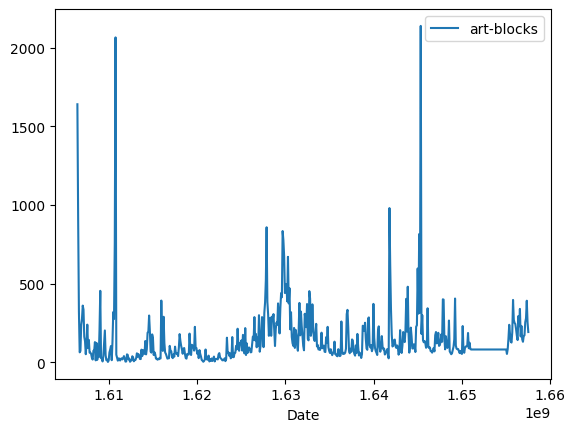

In [112]:
nft_transactions.plot('Date', 'art-blocks');

##### MOVING AVERAGES

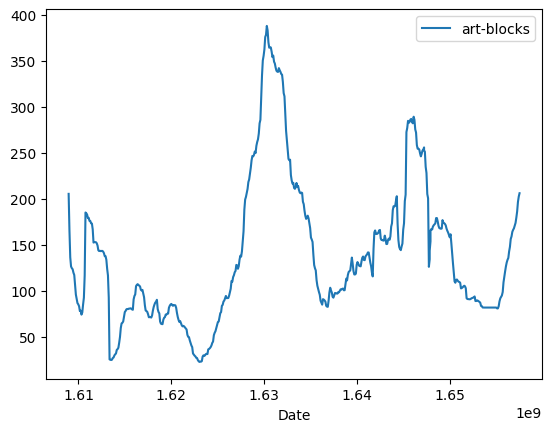

In [113]:
nft_tx_moving_average = nft_transactions.rolling(30, on="Date").mean()
nft_tx_moving_average.plot('Date', 'art-blocks');

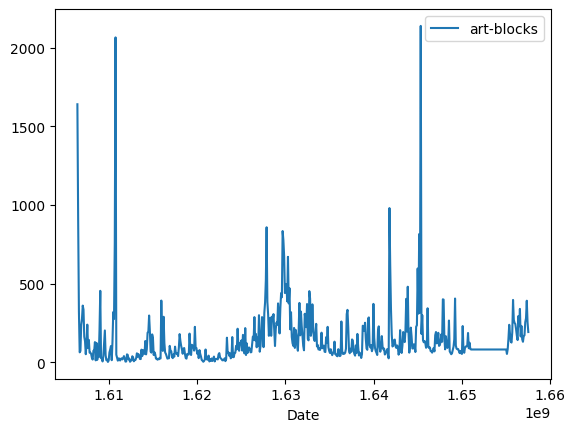

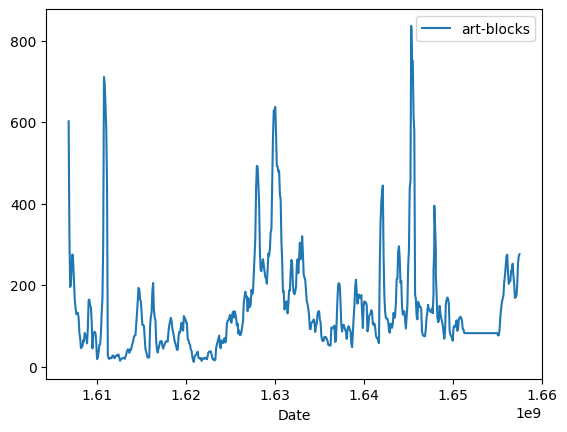

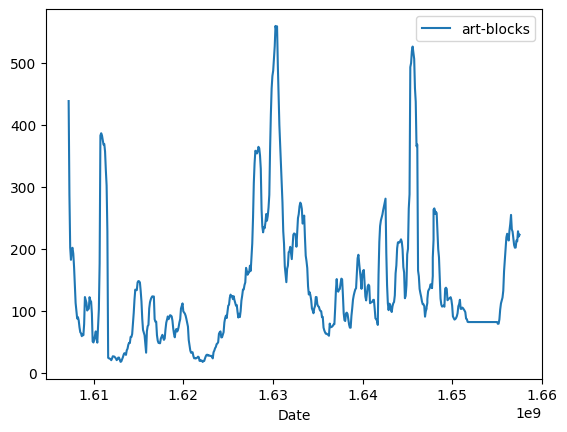

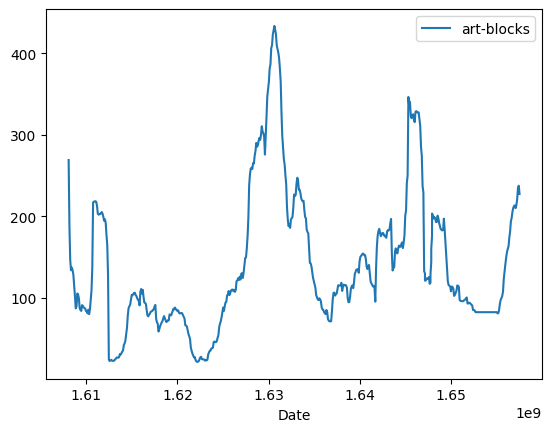

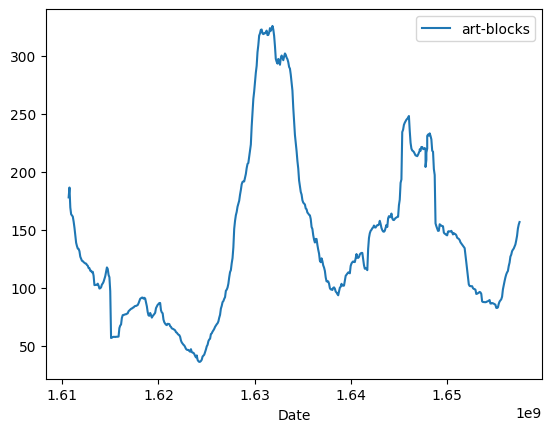

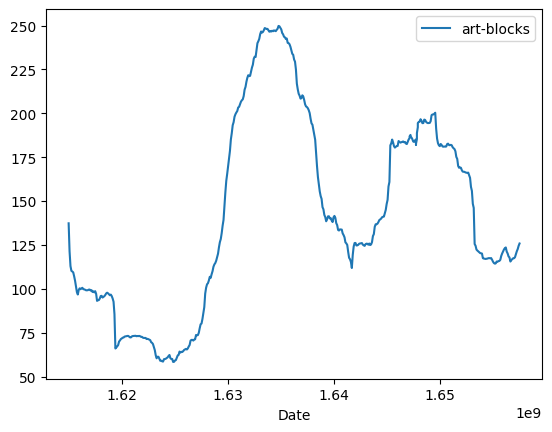

In [114]:
moving_averages = [1, 5,10,20,50,100]

for moving_avg in moving_averages:
    nft_tx_moving_average = nft_transactions.rolling(moving_avg, on="Date").mean()
    nft_tx_moving_average.plot('Date', 'art-blocks');

Let's plot it all on the same chart. We can do this by explicity creating a subplot figure using the matplotlib.pyplot class which will return a Figure and Axes object.

The subplot figure has a single subplot and so when we plot within the for loop, we use the 'ax' parameter and assign it to axes that is returned by the pyplot.subplot object:

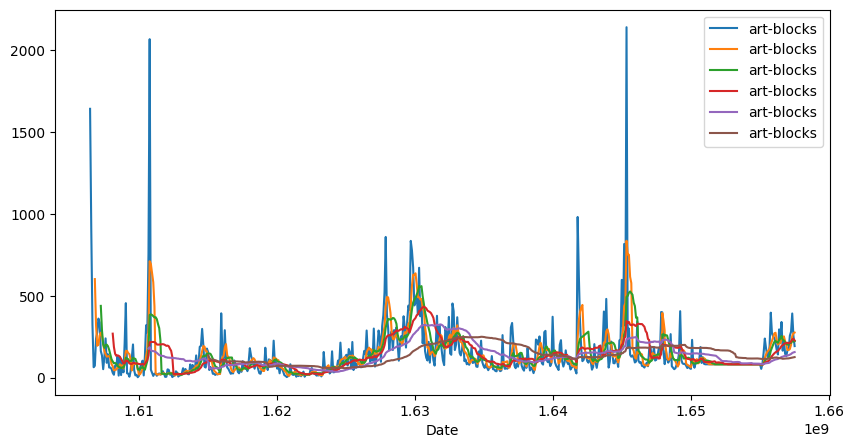

In [115]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through the moving averages
for moving_avg in moving_averages:
    # Calculate the moving average
    nft_tx_moving_average = nft_transactions.rolling(moving_avg, on="Date").mean()
    
    # Plot the moving average on the subplot
    nft_tx_moving_average.plot('Date', 'art-blocks', ax=ax)

# Show the plot
plt.show()

You can see the legend here is not very informative so let's change that with the label parameter in the plot function.

Note the f string formatting. String formatting is a very powerful function of python which you can read more about here: https://realpython.com/python-string-formatting/

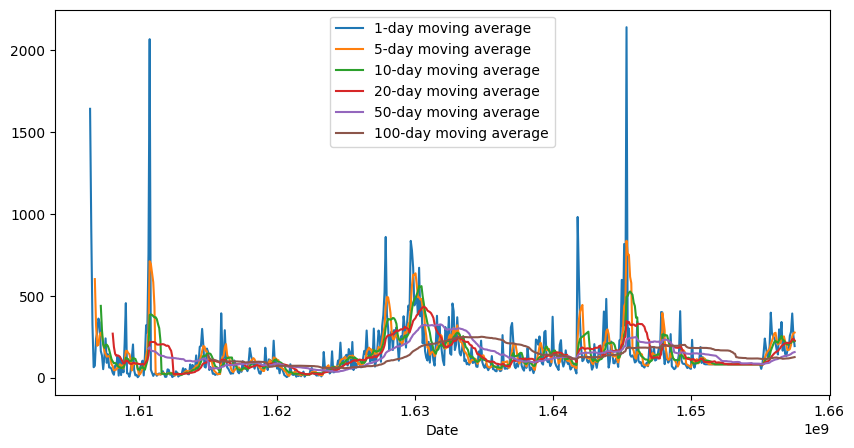

In [116]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through the moving averages
for moving_avg in moving_averages:
    # Calculate the moving average
    nft_tx_moving_average = nft_transactions.rolling(moving_avg, on="Date").mean()
    
    # Plot the moving average on the subplot, with a label indicating the moving average size
    nft_tx_moving_average.plot('Date', 'art-blocks', ax=ax, label=f"{moving_avg}-day moving average")

# Add a legend to the subplot
ax.legend()

# Show the plot
plt.show()

Let's add a title and label our x and y axis explicitly:

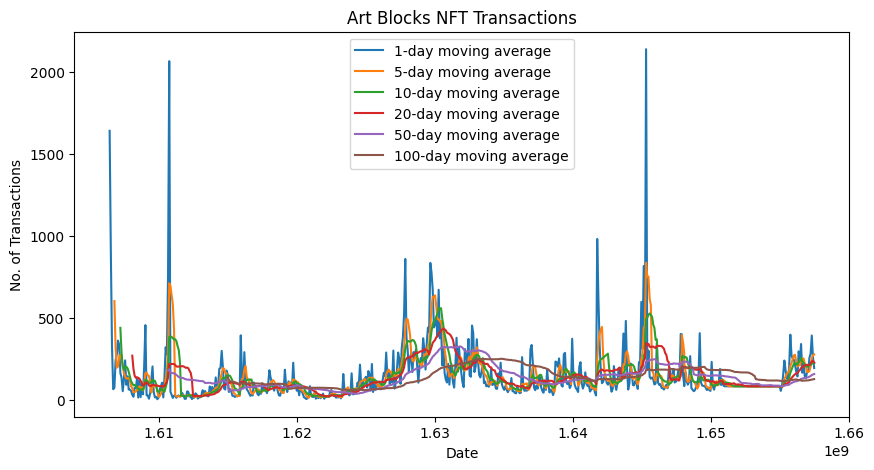

In [117]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through the moving averages
for moving_avg in moving_averages:
    # Calculate the moving average
    nft_tx_moving_average = nft_transactions.rolling(moving_avg, on="Date").mean()
    
    # Plot the moving average on the subplot, with a label indicating the moving average size
    nft_tx_moving_average.plot('Date', 'art-blocks', ax=ax, label=f"{moving_avg}-day moving average")

# Add a legend to the subplot
ax.legend()

plt.title('Art Blocks NFT Transactions')
plt.xlabel('Date')
plt.ylabel('No. of Transactions')

# Show the plot
plt.show()

As a bonus, here is code that plots it all on the same figure but different subplots:

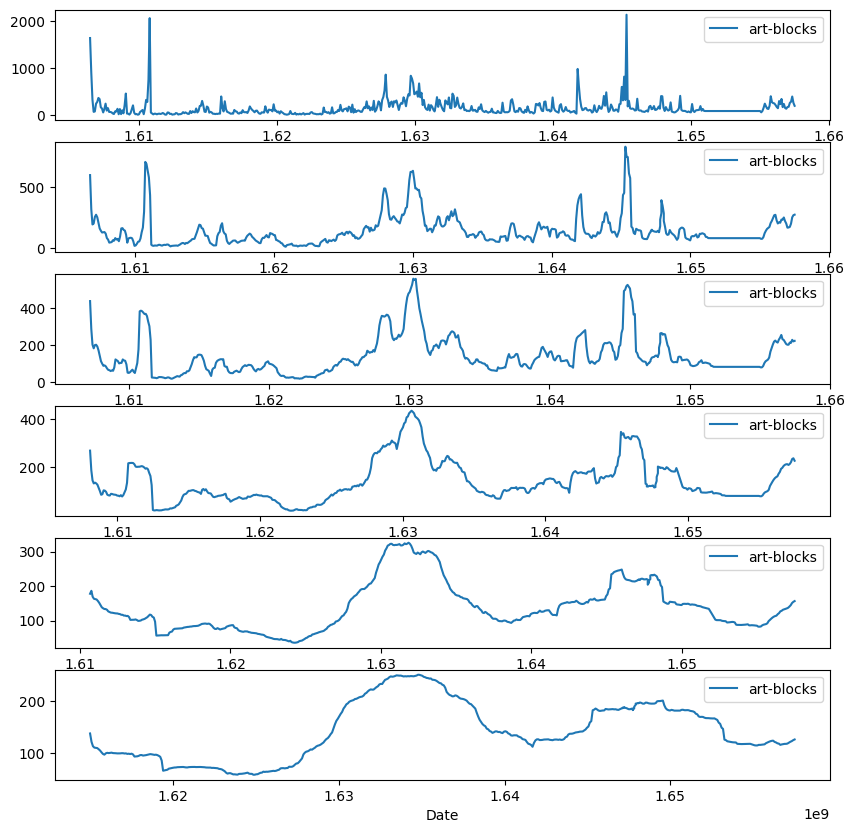

In [118]:
import matplotlib.pyplot as plt

# Create a figure and an array of subplots
fig, axs = plt.subplots(len(moving_averages), 1, figsize=(10, 10))

# Loop through the moving averages
for i, moving_avg in enumerate(moving_averages):
    # Calculate the moving average
    nft_tx_moving_average = nft_transactions.rolling(moving_avg, on="Date").mean()
    
    # Plot the moving average on the appropriate subplot
    nft_tx_moving_average.plot('Date', 'art-blocks', ax=axs[i])

# Show the plot
plt.show()

We can also pass in multiple nft_projects and plot them on the same graph:

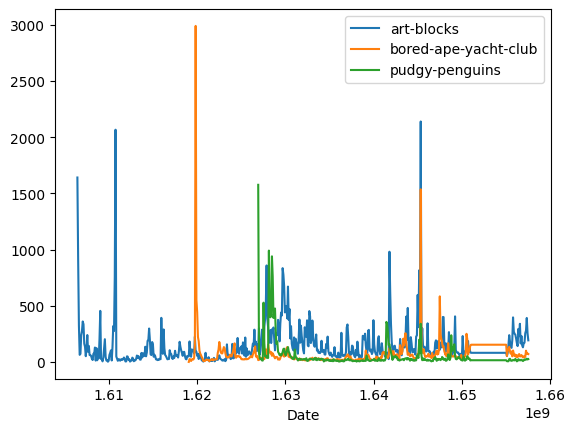

In [119]:
nft_transactions.plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins']);

We can also change the title and axis label with the plot function directly like so:

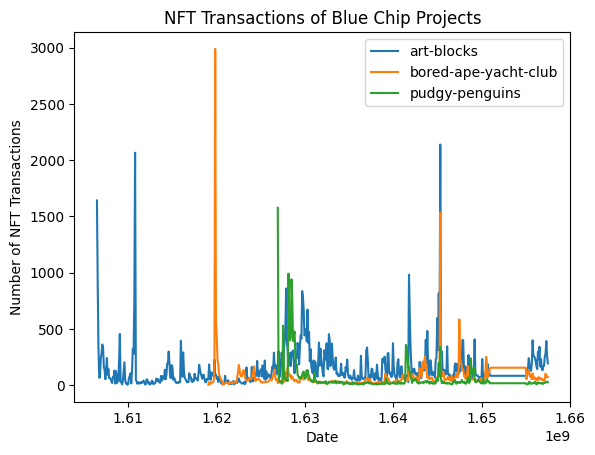

In [120]:
nft_transactions.plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'],
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects');

What if we wanted to do a bar chart instead? We can make use of the *kind* parameter:

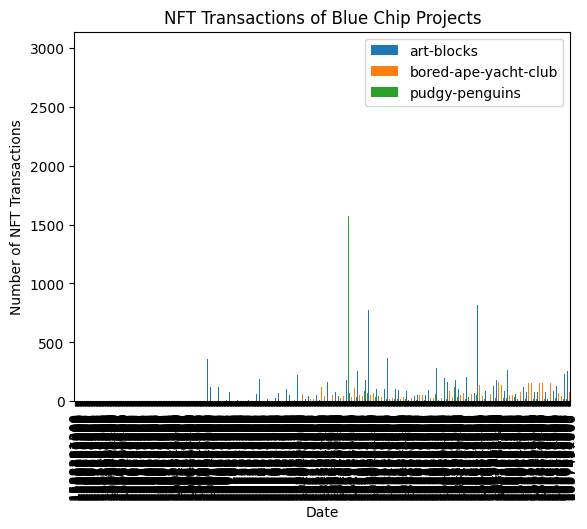

In [121]:
nft_transactions.plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'], kind = 'bar',
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects');

This look very messy, let's turn this into a stacked bar chart:

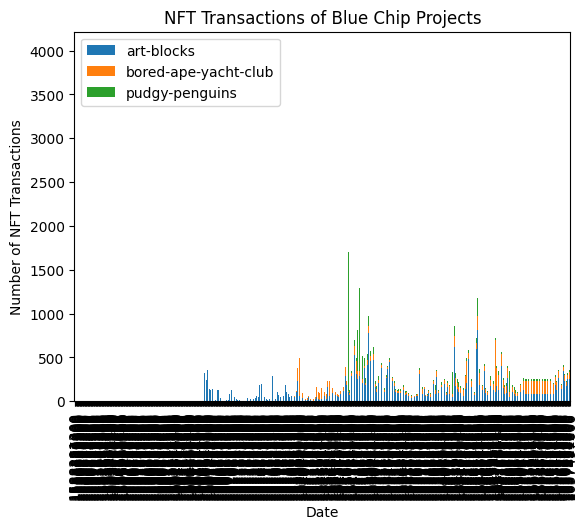

In [122]:
nft_transactions.plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'], kind = 'bar', stacked = True,
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects');

Okay that's better but the Date labels are still not readable. Maybe we can change take data from the last month only and change the figure size to make it wider by using the figsize parameter:

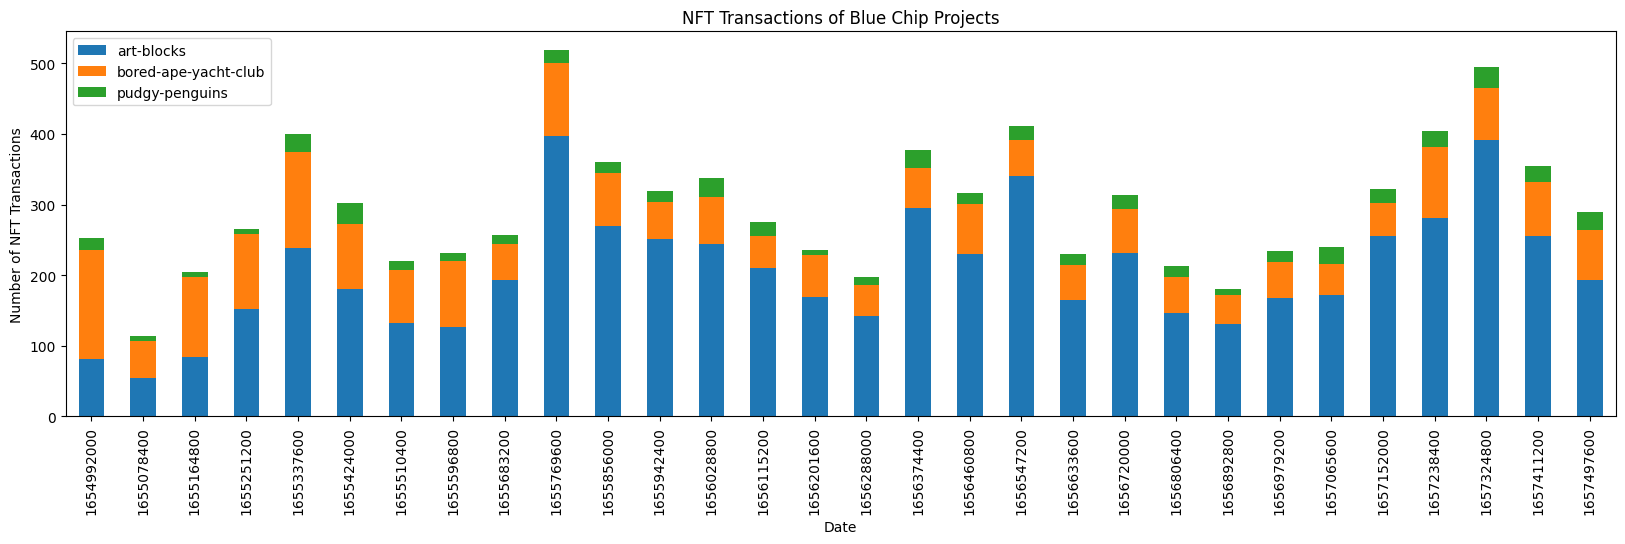

In [123]:
nft_transactions.tail(30).plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'], kind = 'bar', stacked = True,
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects', figsize = (20,5));

The Date of the stablecoins DataFrame is given in numbers as you can see which represents the timestamp. But these timestamps are not immediately interpretable so we should convert to a standard date format using the datetime library.

In [124]:
nft_transactions["Date"] = nft_transactions["Date"].apply(lambda x: datetime.fromtimestamp(x))

Now let's try plot it:

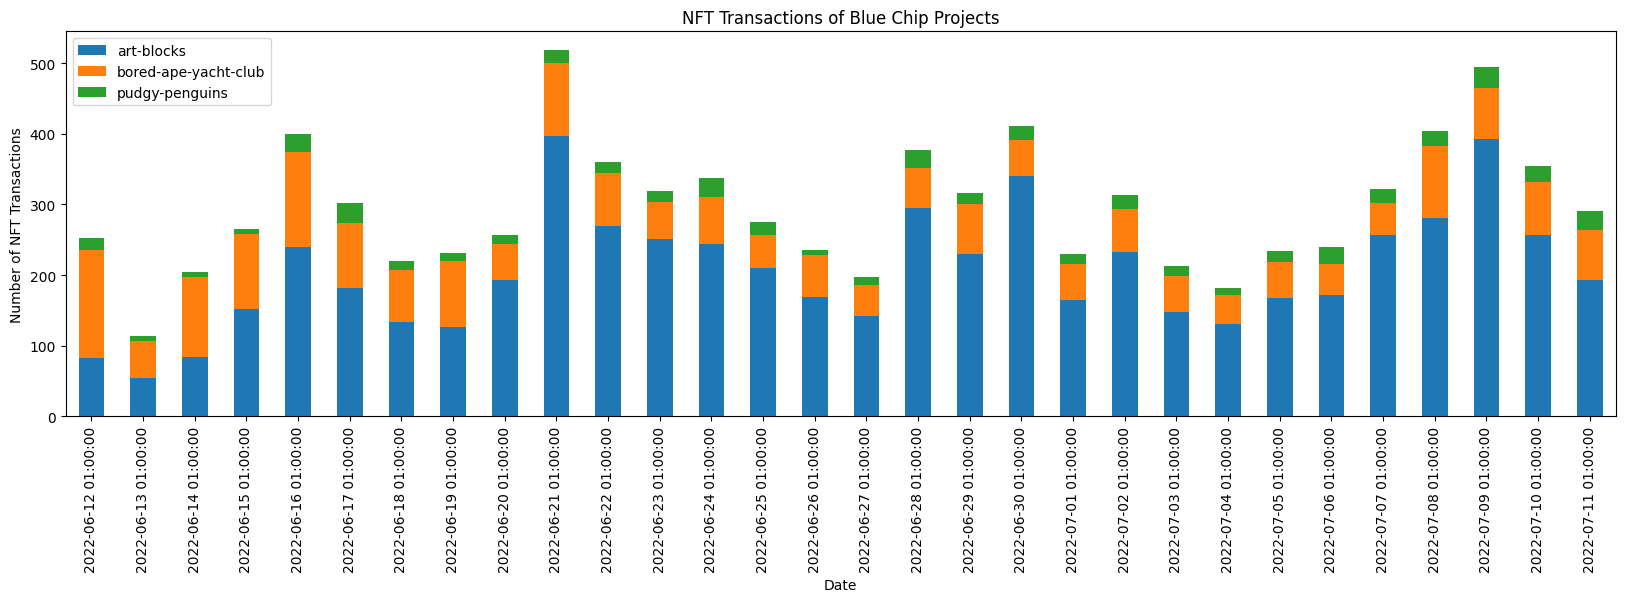

In [125]:
nft_transactions.tail(30).plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'], kind = 'bar', stacked = True,
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects', figsize = (20,5));

The hour, minutes and seconds are unneccesary here given we are plotting daily NFT transactions. So let's remove them by using the strftime() function which allows us to convert the datetime objects to nicely formatted strings:

In [126]:
nft_transactions["Date"] = nft_transactions["Date"].apply(lambda x: x.strftime(format="%Y-%m-%d"))

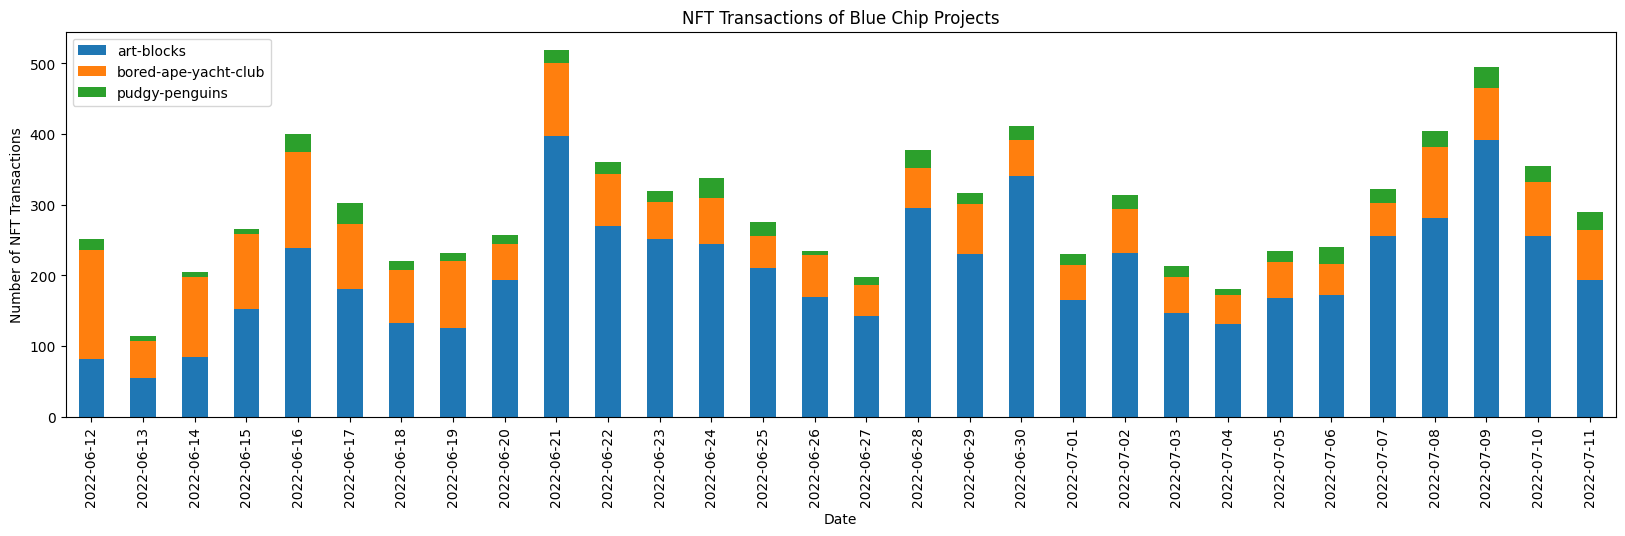

In [127]:
nft_transactions.tail(30).plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'], kind = 'bar', stacked = True,
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects', figsize = (20,5));

This looks much better. Let's play around a little more. What if we change the colours to match the NFT project's respective color theme or any nice colours:

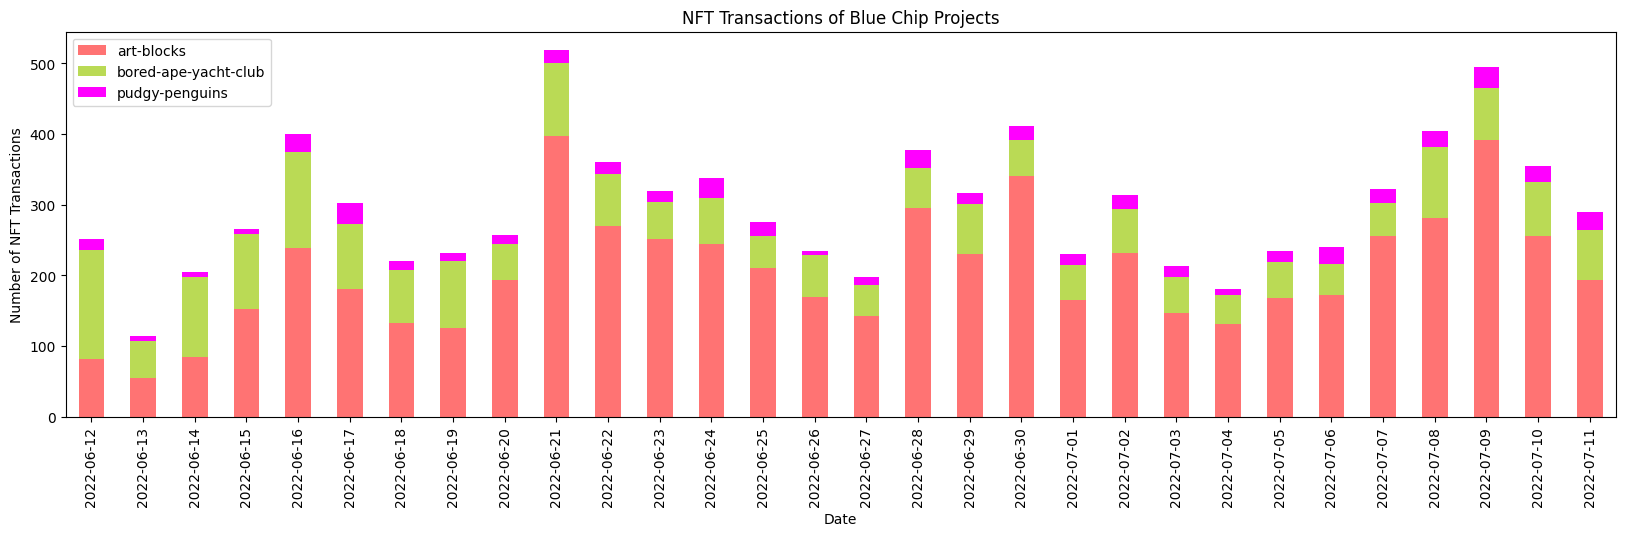

In [128]:
nft_transactions.tail(30).plot('Date', ['art-blocks', 'bored-ape-yacht-club', 'pudgy-penguins'], kind = 'bar', stacked = True,
                     xlabel = 'Date', ylabel = 'Number of NFT Transactions',
                     title = 'NFT Transactions of Blue Chip Projects', figsize = (20,5), color = ['#ff7373', '#bada55', '#ff00ff']);

And that's a wrap for plotting AND this session! Hope you learnt something and please do give us feedback. Note, this session was intended to be a crash course on Pandas 101, there is so much more you can do with this library and you will learn them best as you do projects of your own. Don't forget to leverage online tools such as [ChatGPT](https://openai.com/blog/chatgpt/) and [Stack Overflow](https://stackoverflow.com/) to help you in your pandas journey :) 